In [1]:
!wget "https://raw.githubusercontent.com/opensourcemukul/AIandDeepLearning/main/Datasets/asl/asl_data/sign_mnist_train.csv"

--2021-07-17 04:37:03--  https://raw.githubusercontent.com/opensourcemukul/AIandDeepLearning/main/Datasets/asl/asl_data/sign_mnist_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83279951 (79M) [text/plain]
Saving to: ‘sign_mnist_train.csv’

sign_mnist_train.cs 100%[===================>]  79.42M  92.5MB/s    in 0.9s    

2021-07-17 04:37:10 (92.5 MB/s) - ‘sign_mnist_train.csv’ saved [83279951/83279951]



In [2]:
!wget "https://raw.githubusercontent.com/opensourcemukul/AIandDeepLearning/main/Datasets/asl/asl_data/sign_mnist_valid.csv"

--2021-07-17 04:37:30--  https://raw.githubusercontent.com/opensourcemukul/AIandDeepLearning/main/Datasets/asl/asl_data/sign_mnist_valid.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21777154 (21M) [text/plain]
Saving to: ‘sign_mnist_valid.csv’

sign_mnist_valid.cs 100%[===================>]  20.77M  42.3MB/s    in 0.5s    

2021-07-17 04:37:33 (42.3 MB/s) - ‘sign_mnist_valid.csv’ saved [21777154/21777154]



In [3]:
import pandas as pd
import numpy as np

In [5]:
train_df = pd.read_csv("sign_mnist_train.csv")

In [6]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,12,189,189,190,190,192,193,193,193,193,194,193,193,194,194,195,195,196,194,195,196,196,197,196,197,197,196,195,195,189,190,192,192,193,194,195,196,196,196,193,...,115,92,132,173,118,84,53,135,253,213,219,208,82,82,84,85,85,87,84,87,78,113,216,189,172,175,155,131,116,93,132,165,99,77,52,200,234,200,222,225
27451,22,151,154,157,158,160,161,163,164,166,167,169,169,169,169,169,169,169,169,169,167,167,167,166,165,164,164,163,162,153,156,159,160,162,163,164,165,167,169,172,...,199,200,199,199,198,199,198,197,196,195,195,194,66,67,65,62,61,41,32,37,33,30,28,38,187,202,199,199,199,199,198,198,198,198,198,196,195,195,195,194
27452,17,174,174,174,174,174,175,175,174,173,173,173,172,171,171,171,170,169,168,166,166,165,165,163,162,161,160,158,156,178,178,177,176,177,177,177,176,176,176,175,...,110,85,90,166,205,207,205,203,202,201,200,198,217,217,217,218,218,211,203,200,189,171,157,145,136,129,128,125,101,77,121,196,209,208,206,204,203,202,200,200
27453,16,177,181,184,185,187,189,190,191,191,190,191,193,192,191,191,191,191,190,190,189,187,186,184,183,182,181,179,177,179,182,185,187,189,190,192,192,192,192,194,...,190,173,140,80,28,60,70,61,61,78,100,86,136,135,135,135,132,132,136,136,137,144,103,120,197,200,195,196,170,149,119,56,27,58,102,79,47,64,87,93


In [7]:
valid_df = pd.read_csv("sign_mnist_valid.csv")

In [8]:
valid_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,9,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,133,143,148,156,160,162,164,168,171,173,175,178,179,181,182,184,185,185,186,137,116,111,101,110,92,66,108,124,132,155,...,147,132,115,112,117,118,112,153,189,178,173,166,140,121,157,125,93,99,100,101,104,100,118,167,154,141,136,139,135,125,108,112,116,114,118,180,184,176,167,163
7168,11,157,159,161,164,166,166,171,174,175,176,176,176,178,176,176,178,177,176,178,178,177,176,176,176,174,174,173,173,159,163,164,166,168,169,173,175,177,178,177,...,90,78,191,215,212,214,212,209,209,208,208,207,189,192,196,199,191,208,230,201,197,185,184,187,169,136,131,107,69,127,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,192,193,192,191,192,191,191,192,189,189,189,188,188,188,187,186,185,184,183,193,193,193,193,193,193,194,194,193,195,195,...,215,215,215,214,213,213,212,212,210,209,208,207,215,215,207,207,208,207,203,196,170,99,92,92,89,155,213,216,216,216,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,229,234,233,233,237,237,237,240,241,238,240,240,242,243,241,239,239,239,239,206,209,212,215,218,220,223,226,227,229,236,...,168,173,128,127,255,255,255,255,159,99,80,77,255,255,255,255,255,255,231,255,255,255,255,255,249,231,188,164,169,176,112,169,255,255,237,113,91,67,70,63


In [11]:
y_train = train_df['label']
del train_df['label']
x_train = train_df.values

In [12]:
x_train

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]])

In [13]:
y_train

0         3
1         6
2         2
3         2
4        12
         ..
27450    12
27451    22
27452    17
27453    16
27454    22
Name: label, Length: 27455, dtype: int64

In [14]:
y_valid = valid_df['label']
del valid_df['label']
x_valid = valid_df.values

In [ ]:
#now we have x_train, y_train and x_valid, y_valid

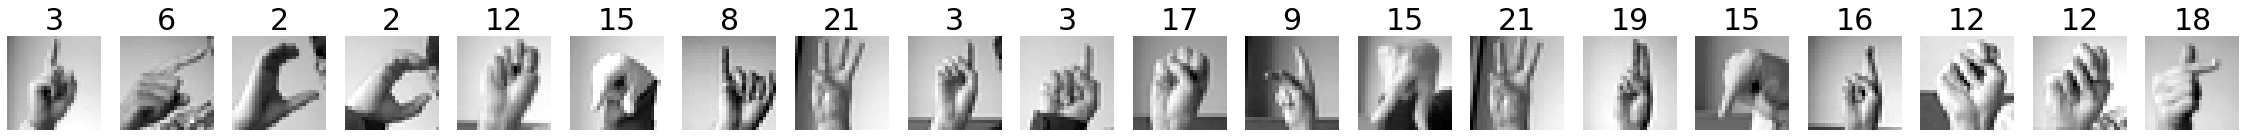

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
num_images = 20
for i in range(num_images):
  row = x_train[i]
  label = y_train[i]
  image = row.reshape(28,28)
  plt.subplot(1, num_images, i+1)
  plt.title(label, fontdict={'fontsize': 30})
  plt.axis('off')
  plt.imshow(image, cmap = 'gray')

In [18]:
# want to normalize
x_train = x_train/255
x_valid = x_valid/255

In [ ]:
# how to find the number of classes

In [19]:
y_train

0         3
1         6
2         2
3         2
4        12
         ..
27450    12
27451    22
27452    17
27453    16
27454    22
Name: label, Length: 27455, dtype: int64

In [21]:
type(y_train)

pandas.core.series.Series

In [23]:
len(pd.unique(y_train))

24

In [25]:
num_classes = 24

In [24]:
import tensorflow.keras as keras

In [26]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

In [27]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [31]:
from keras.models import Sequential
from keras.layers import Dense


In [32]:
# make a DNN with only Fully Connected (FC) layers, use Dense in keras
model = Sequential()
model.add(Dense(units = 512, activation = 'relu', input_shape = (784, )))
model.add(Dense(units = num_classes, activation = 'softmax'))

# compile the model
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [34]:
model.fit(x_train, y_train, epochs = 10, verbose = 1, validation_data=(x_valid, y_valid))

Epoch 1/10
858/858 [==============================] - 21s 8ms/step - loss: 2.6161 - accuracy: 0.2401 - val_loss: 1.5080 - val_accuracy: 0.5344
Epoch 2/10
858/858 [==============================] - 6s 7ms/step - loss: 1.2169 - accuracy: 0.6134 - val_loss: 1.2248 - val_accuracy: 0.6206
Epoch 3/10
858/858 [==============================] - 6s 7ms/step - loss: 0.8330 - accuracy: 0.7309 - val_loss: 1.4088 - val_accuracy: 0.5740
Epoch 4/10
858/858 [==============================] - 6s 7ms/step - loss: 0.6044 - accuracy: 0.8030 - val_loss: 1.2094 - val_accuracy: 0.6357
Epoch 5/10
858/858 [==============================] - 6s 7ms/step - loss: 0.4490 - accuracy: 0.8503 - val_loss: 1.2812 - val_accuracy: 0.6082
Epoch 6/10
858/858 [==============================] - 6s 7ms/step - loss: 0.3454 - accuracy: 0.8877 - val_loss: 1.0654 - val_accuracy: 0.6988
Epoch 7/10
858/858 [==============================] - 6s 7ms/step - loss: 0.2666 - accuracy: 0.9126 - val_loss: 0.9610 - val_accuracy: 0.7380
Epoch

In [35]:
del model
model = Sequential()
model.add(Dense(units = 512, activation = 'relu', input_shape = (784, )))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = num_classes, activation = 'softmax'))

# compile the model
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [36]:
model.fit(x_train, y_train, epochs = 10, verbose = 1, validation_data=(x_valid, y_valid))

Epoch 1/10
858/858 [==============================] - 11s 11ms/step - loss: 2.5253 - accuracy: 0.2419 - val_loss: 1.2919 - val_accuracy: 0.5572
Epoch 2/10
858/858 [==============================] - 9s 11ms/step - loss: 1.0943 - accuracy: 0.6333 - val_loss: 1.5556 - val_accuracy: 0.5197
Epoch 3/10
858/858 [==============================] - 9s 11ms/step - loss: 0.6432 - accuracy: 0.7807 - val_loss: 0.9788 - val_accuracy: 0.7163
Epoch 4/10
858/858 [==============================] - 9s 11ms/step - loss: 0.4383 - accuracy: 0.8573 - val_loss: 1.7075 - val_accuracy: 0.6343
Epoch 5/10
858/858 [==============================] - 10s 12ms/step - loss: 0.3395 - accuracy: 0.8961 - val_loss: 0.8392 - val_accuracy: 0.8019
Epoch 6/10
858/858 [==============================] - 9s 11ms/step - loss: 0.2720 - accuracy: 0.9254 - val_loss: 1.0855 - val_accuracy: 0.7793
Epoch 7/10
858/858 [==============================] - 9s 11ms/step - loss: 0.2356 - accuracy: 0.9391 - val_loss: 1.2269 - val_accuracy: 0.78

In [48]:
del model

In [38]:
x_train.shape

(27455, 784)

In [39]:
# lets create a CNN - Convolutional Neural Network
x_train = x_train.reshape(-1,28,28,1)
x_train = x_train.reshape(-1,28,28,1)

In [40]:
x_train.shape

(27455, 28, 28, 1)

In [49]:
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

In [50]:
model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

In [53]:
model.compile(loss= 'categorical_crossentropy', metrics = ['accuracy'])

In [55]:
model.fit(x_train, y_train, epochs = 10, verbose = 1, validation_data=(x_valid, y_valid))

Epoch 1/10
858/858 [==============================] - ETA: 0s - loss: 0.8258 - accuracy: 0.7564WARNING:tensorflow:Model was constructed with shape (None, 28, 28, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='module_wrapper_28_input'), name='module_wrapper_28_input', description="created by layer 'module_wrapper_28_input'"), but it was called on an input with incompatible shape (None, 784).


ValueError: ignored

In [54]:
model.summary()

ValueError: ignored

In [56]:
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

In [57]:
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

In [60]:
model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

In [65]:
input_shape = (None, 28, 28, 1)
model.build(input_shape)

In [66]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_56 (ModuleWra multiple                  750       
_________________________________________________________________
module_wrapper_57 (ModuleWra multiple                  300       
_________________________________________________________________
module_wrapper_58 (ModuleWra multiple                  0         
_________________________________________________________________
module_wrapper_59 (ModuleWra multiple                  33800     
_________________________________________________________________
module_wrapper_60 (ModuleWra multiple                  0         
_________________________________________________________________
module_wrapper_61 (ModuleWra multiple                  200       
_________________________________________________________________
module_wrapper_62 (ModuleWra multiple                 

In [67]:
model.compile(loss= 'categorical_crossentropy', metrics = ['accuracy'])

In [68]:
model.fit(x_train, y_train, epochs = 10, verbose = 1, validation_data=(x_valid, y_valid))

Epoch 1/10
858/858 [==============================] - 108s 124ms/step - loss: 0.8938 - accuracy: 0.7405 - val_loss: 0.4523 - val_accuracy: 0.8769
Epoch 2/10
858/858 [==============================] - 105s 122ms/step - loss: 0.0267 - accuracy: 0.9923 - val_loss: 0.1883 - val_accuracy: 0.9576
Epoch 3/10
858/858 [==============================] - 104s 121ms/step - loss: 0.0122 - accuracy: 0.9960 - val_loss: 0.3751 - val_accuracy: 0.9219
Epoch 4/10
858/858 [==============================] - 105s 122ms/step - loss: 0.0086 - accuracy: 0.9977 - val_loss: 0.2932 - val_accuracy: 0.9389
Epoch 5/10
858/858 [==============================] - 105s 122ms/step - loss: 0.0058 - accuracy: 0.9978 - val_loss: 0.3332 - val_accuracy: 0.9377
Epoch 6/10
858/858 [==============================] - 105s 122ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.6833 - val_accuracy: 0.8869
Epoch 7/10
858/858 [==============================] - 104s 122ms/step - loss: 0.0050 - accuracy: 0.9987 - val_loss: 0.5060 -